In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

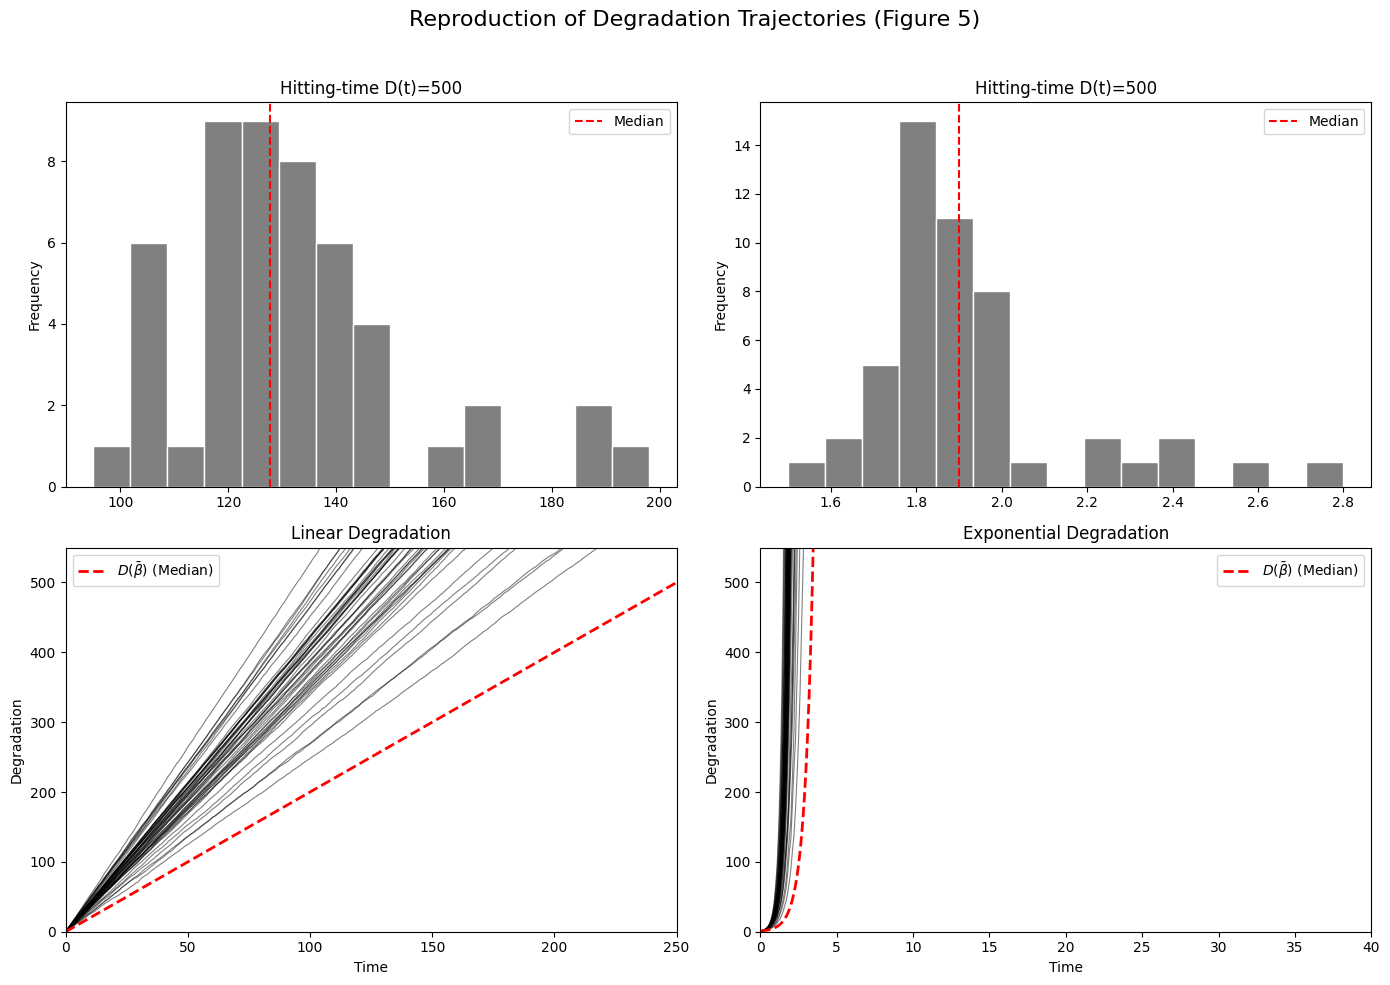

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
NUM_TRAJECTORIES = 50       # Number of degradation paths to simulate
THRESHOLD = 500             # Degradation level to calculate "hitting time"

# Parameters for the random variables (gamma and eta)
MU = 2.0
SIGMA = 0.5

# --- Linear Degradation Simulation ---
T_MAX_LINEAR = 250
DT_LINEAR = 0.5
time_linear = np.arange(0, T_MAX_LINEAR, DT_LINEAR)
linear_hitting_times = []
linear_trajectories = []

for _ in range(NUM_TRAJECTORIES):
    gamma = np.random.normal(MU, SIGMA)  # Choose gamma once per trajectory
    degradation = np.zeros_like(time_linear)
    hitting_time_found = False
    
    for i in range(1, len(time_linear)):
        eta = np.random.normal(MU, SIGMA) # Choose eta at each time step
        
        # The article simplifies beta(t) = gamma + eta(t) for this example
        # And the linear model is D_dot = beta_0(t)
        beta_0 = gamma + eta
        
        # Prevent negative degradation, which is physically unrealistic
        if beta_0 < 0:
            beta_0 = 0
            
        degradation[i] = degradation[i-1] + beta_0 * DT_LINEAR
        
        if degradation[i] >= THRESHOLD and not hitting_time_found:
            linear_hitting_times.append(time_linear[i])
            hitting_time_found = True
            
    linear_trajectories.append(degradation)

# --- Exponential Degradation Simulation ---
T_MAX_EXP = 40
DT_EXP = 0.1
time_exp = np.arange(0, T_MAX_EXP, DT_EXP)
exp_hitting_times = []
exp_trajectories = []

for _ in range(NUM_TRAJECTORIES):
    gamma = np.random.normal(MU, SIGMA) # Choose gamma once per trajectory
    degradation = np.zeros_like(time_exp)
    degradation[0] = 1.0  # Start with a small non-zero value for growth
    hitting_time_found = False

    for i in range(1, len(time_exp)):
        eta = np.random.normal(MU, SIGMA) # Choose eta at each time step
        
        # The exponential model is D_dot = beta_1(t) * D(t)
        beta_1 = gamma + eta
        if beta_1 < 0:
            beta_1 = 0
        
        degradation[i] = degradation[i-1] + beta_1 * degradation[i-1] * DT_EXP

        if degradation[i] >= THRESHOLD and not hitting_time_found:
            exp_hitting_times.append(time_exp[i])
            hitting_time_found = True

    exp_trajectories.append(degradation)

# --- Calculate Median Trajectories (using the mean beta) ---
# Linear Median
median_linear_degradation = np.zeros_like(time_linear)
for i in range(1, len(time_linear)):
    median_linear_degradation[i] = median_linear_degradation[i-1] + MU * DT_LINEAR

# Exponential Median
median_exp_degradation = np.zeros_like(time_exp)
median_exp_degradation[0] = 1.0
for i in range(1, len(time_exp)):
    median_exp_degradation[i] = median_exp_degradation[i-1] + MU * median_exp_degradation[i-1] * DT_EXP
    
# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Reproduction of Degradation Trajectories (Figure 5)", fontsize=16)

# Plot Linear Trajectories
ax_lin_traj = axs[1, 0]
for traj in linear_trajectories:
    ax_lin_traj.plot(time_linear, traj, color='black', alpha=0.5, linewidth=0.8)
ax_lin_traj.plot(time_linear, median_linear_degradation, 'r--', label=r'$D(\bar{\beta})$ (Median)', linewidth=2)
ax_lin_traj.set_title("Linear Degradation")
ax_lin_traj.set_xlabel("Time")
ax_lin_traj.set_ylabel("Degradation")
ax_lin_traj.set_ylim(0, THRESHOLD + 50)
ax_lin_traj.set_xlim(0, T_MAX_LINEAR)
ax_lin_traj.legend()

# Plot Linear Hitting Time Histogram
ax_lin_hist = axs[0, 0]
ax_lin_hist.hist(linear_hitting_times, bins=15, color='gray', edgecolor='white')
ax_lin_hist.axvline(np.median(linear_hitting_times), color='r', linestyle='--', label='Median')
ax_lin_hist.set_title(f"Hitting-time D(t)={THRESHOLD}")
ax_lin_hist.set_ylabel("Frequency")
ax_lin_hist.legend()

# Plot Exponential Trajectories
ax_exp_traj = axs[1, 1]
for traj in exp_trajectories:
    ax_exp_traj.plot(time_exp, traj, color='black', alpha=0.5, linewidth=0.8)
ax_exp_traj.plot(time_exp, median_exp_degradation, 'r--', label=r'$D(\bar{\beta})$ (Median)', linewidth=2)
ax_exp_traj.set_title("Exponential Degradation")
ax_exp_traj.set_xlabel("Time")
ax_exp_traj.set_ylabel("Degradation")
ax_exp_traj.set_ylim(0, THRESHOLD + 50)
ax_exp_traj.set_xlim(0, T_MAX_EXP)
ax_exp_traj.legend()

# Plot Exponential Hitting Time Histogram
ax_exp_hist = axs[0, 1]
ax_exp_hist.hist(exp_hitting_times, bins=15, color='gray', edgecolor='white')
ax_exp_hist.axvline(np.median(exp_hitting_times), color='r', linestyle='--', label='Median')
ax_exp_hist.set_title(f"Hitting-time D(t)={THRESHOLD}")
ax_exp_hist.set_ylabel("Frequency")
ax_exp_hist.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

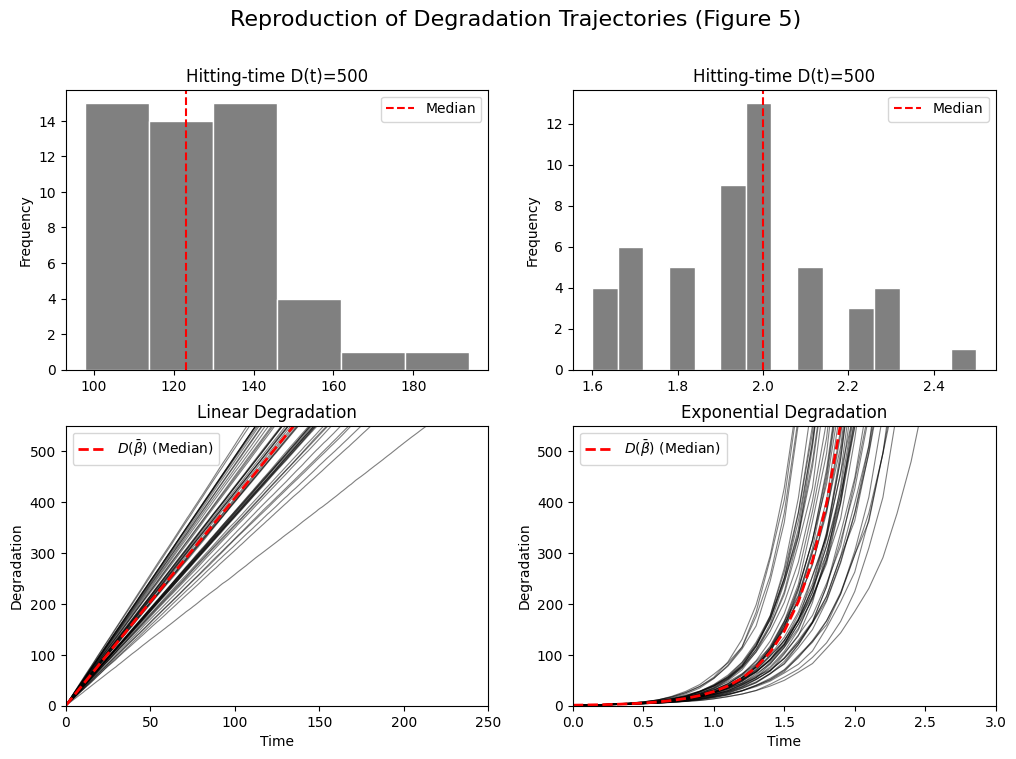

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation Parameters ---
NUM_TRAJECTORIES = 50       # Number of degradation paths to simulate
THRESHOLD = 500             # Degradation level to calculate "hitting time"

# Parameters for the random variables (gamma and eta)
MU = 2.0
SIGMA = 0.5

# --- Linear Degradation Simulation ---
T_MAX_LINEAR = 250
DT_LINEAR = 0.1
time_linear = np.arange(0, T_MAX_LINEAR, DT_LINEAR)
linear_hitting_times = []
linear_trajectories = []
betas_0 = np.array([])
for _ in range(NUM_TRAJECTORIES):
    gamma = np.random.normal(MU, SIGMA)  # Choose gamma once per trajectory
    degradation = np.zeros_like(time_linear)
    hitting_time_found = False
    
    for i in range(1, len(time_linear)):
        
        eta = np.random.normal(MU, SIGMA) # Choose eta at each time step
        beta_0 = gamma + eta
        betas_0 = np.append(betas_0,beta_0)
        
        # Prevent negative degradation, which is physically unrealistic
        if beta_0 < 0:
            beta_0 = 0
            
        degradation[i] = degradation[i-1] + beta_0 * DT_LINEAR
        
        if degradation[i] >= THRESHOLD and not hitting_time_found:
            linear_hitting_times.append(time_linear[i])
            hitting_time_found = True
            
    linear_trajectories.append(degradation)

b0_bar = np.mean(betas_0)

# --- Exponential Degradation Simulation ---
T_MAX_EXP = 40
DT_EXP = 0.1
time_exp = np.arange(0, T_MAX_EXP, DT_EXP)
exp_hitting_times = []
exp_trajectories = []
betas_1 = np.array([])

for _ in range(NUM_TRAJECTORIES):
    gamma = np.random.normal(MU, SIGMA) # Choose gamma once per trajectory
    degradation = np.zeros_like(time_exp)
    degradation[0] = 1.0  # Start with a small non-zero value for growth
    hitting_time_found = False
    
    for i in range(1, len(time_exp)):
        eta = np.random.normal(MU, SIGMA) # Choose eta at each time step
        
        # The exponential model is D_dot = beta_1(t) * D(t)
        beta_1 = gamma + eta
        if beta_1 < 0:
            beta_1 = 0
        betas_1 = np.append(betas_1,beta_1)
        degradation[i] = degradation[i-1] + beta_1 * degradation[i-1] * DT_EXP

        if degradation[i] >= THRESHOLD and not hitting_time_found:
            exp_hitting_times.append(time_exp[i])
            hitting_time_found = True

    exp_trajectories.append(degradation)

b1_bar = np.mean(betas_1)
# --- Calculate Median Trajectories (using the mean beta) ---
# Linear Median
median_linear_degradation = np.zeros_like(time_linear)
for i in range(1, len(time_linear)):
    median_linear_degradation[i] = median_linear_degradation[i-1] + (b0_bar) * DT_LINEAR
# Exponential Median
median_exp_degradation = np.zeros_like(time_exp)
median_exp_degradation[0] = 1.0
for i in range(1, len(time_exp)):
    median_exp_degradation[i] = median_exp_degradation[i-1] + b1_bar * median_exp_degradation[i-1] * DT_EXP
    
# --- Plotting ---
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Reproduction of Degradation Trajectories (Figure 5)", fontsize=16)

# Plot Linear Hitting Time Histogram
ax_lin_hist = axs[0,0]
ax_lin_hist.hist(linear_hitting_times, bins=6, color='gray', edgecolor='white')
ax_lin_hist.axvline(np.median(linear_hitting_times), color='r', linestyle='--', label='Median')
ax_lin_hist.set_title(f"Hitting-time D(t)={THRESHOLD}")
ax_lin_hist.set_ylabel("Frequency")
ax_lin_hist.legend()


# Plot Linear Trajectories
ax_lin_traj = axs[1,0]
for traj in linear_trajectories:
    ax_lin_traj.plot(time_linear, traj, color='black', alpha=0.5, linewidth=0.8)
ax_lin_traj.plot(time_linear, median_linear_degradation, 'r--', label=r'$D(\bar{\beta})$ (Median)', linewidth=2)
ax_lin_traj.set_title("Linear Degradation")
ax_lin_traj.set_xlabel("Time")
ax_lin_traj.set_ylabel("Degradation")
ax_lin_traj.set_ylim(0, THRESHOLD + 50)
ax_lin_traj.set_xlim(0, T_MAX_LINEAR)
ax_lin_traj.legend()

# Plot Exponential Hitting Time Histogram
ax_exp_hist = axs[0, 1]
ax_exp_hist.hist(exp_hitting_times, bins=15, color='gray', edgecolor='white')
ax_exp_hist.axvline(np.median(exp_hitting_times), color='r', linestyle='--', label='Median')
ax_exp_hist.set_title(f"Hitting-time D(t)={THRESHOLD}")
ax_exp_hist.set_ylabel("Frequency")
ax_exp_hist.legend()

ax_exp_traj = axs[1, 1]
for traj in exp_trajectories:
    ax_exp_traj.plot(time_exp, traj, color='black', alpha=0.5, linewidth=0.8)
ax_exp_traj.plot(time_exp, median_exp_degradation, 'r--', label=r'$D(\bar{\beta})$ (Median)', linewidth=2)
ax_exp_traj.set_title("Exponential Degradation")
ax_exp_traj.set_xlabel("Time")
ax_exp_traj.set_ylabel("Degradation")
ax_exp_traj.set_ylim(0, THRESHOLD + 50)
ax_exp_traj.set_xlim(0, 3)
ax_exp_traj.legend()



""" plt.tight_layout(rect=[0, 0, 1, 0.96]) """
plt.show()

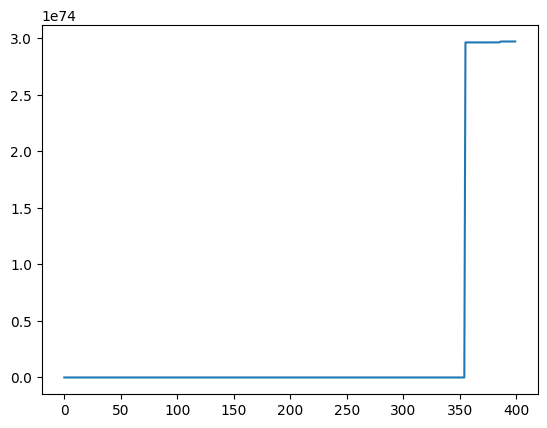

In [60]:
T_MAX_EXP = 40
DT_EXP = 0.1
time_exp = np.arange(0, T_MAX_EXP, DT_EXP)
exp_hitting_times = []
exp_trajectories = []
betas_1 = np.array([])
NUM_TRAJECTORIES=1

for _ in range(NUM_TRAJECTORIES):
    gamma = np.random.normal(MU, SIGMA) # Choose gamma once per trajectory
    degradation = np.zeros_like(time_exp)
    degradation[0] = 1.0  # Start with a small non-zero value for growth
    hitting_time_found = False
    
    for i in range(1, len(time_exp)):
        eta = np.random.normal(MU, SIGMA) # Choose eta at each time step
        
        # The exponential model is D_dot = beta_1(t) * D(t)
        beta_1 = gamma + eta
        if beta_1 < 0:
            beta_1 = 0
        betas_1 = np.append(betas_1,beta_1)
        degradation[i] = degradation[i-1] + np.exp(i*DT_EXP*beta_1)

        if degradation[i] >= THRESHOLD and not hitting_time_found:
            exp_hitting_times.append(time_exp[i])
            hitting_time_found = True

    exp_trajectories.append(degradation)

    plt.plot(exp_trajectories[0])

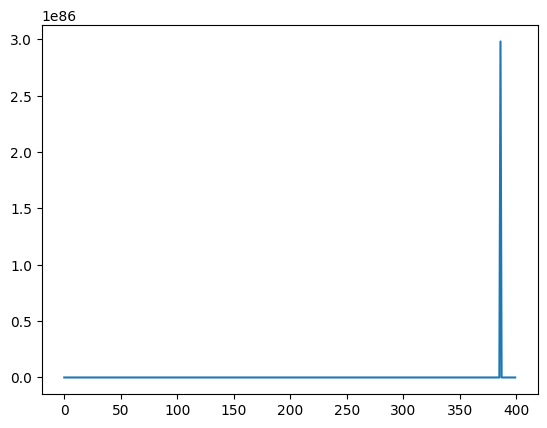

In [44]:
plt.plot(exp_trajectories[0])